<a href="https://colab.research.google.com/github/Loris997/Assignments-Loris-Widmer/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following assignment consists again of a theoretical part (learning portfolio) and a practical part (assignment). The goal is to train a neural model from scratch, as we did a few weeks ago. I would like us to repeat the most important things so that we can consolidate our knowledge in this area, for this you will train a model on a dataset that I will provide via OLAT. 

The plan would be that in the first we will discuss your learnings from the theory part, that means you are relatively free to fill your Learning Portfolio on this topic and in the following week we will discuss your solutions of the Classification Model.

#Theory part (filling your Learning Portfolio, May 24)

In preparation for the practical part, I ask you to familiarize yourself with the following video sources in the next week:

1) Please watch the following video until random forests:

https://course.fast.ai/Lessons/lesson5.html

2) Please download the following notebooks and edit it in Google-Colab. Take notes and update your Learning Portfolio.

https://www.kaggle.com/code/jhoward/linear-model-and-neural-net-from-scratch

https://www.kaggle.com/code/jhoward/why-you-should-use-a-framework

The contents should be mostly known to you, because these contents are also based on chapter 4, which we have already worked on. We repeat the basics again with a new data set to consolidate our knowledge.



#Practical part (Assignment, May 31)

The following task is a binary classification task. The first column is our target. All variables are categorical variables from which you have to create dummy variables. The target column has only the property Q or F, which is to be modeled. As always, please create a train and a test data set, e.g. 80:20 or 90:10. Your goal is to create a neural network that best predicts the target column. Use probabilities with the sigmoid function as discussed in the theory. When designing your neural network, play with a few different numbers and sizes of layers and different activation functions.

To validate your model, you can compare your results with a logistic regression model. (Note: This data set should allow you to achieve very high accuracies: > 98% maybe even >99%) You can see how these results vary when you use 50% for testing and 50% for training.

In [ ]:
import pandas as pd
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/SE/data_homework_6.csv")

data.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,target,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,...,variable_13,variable_14,variable_15,variable_16,variable_17,variable_18,variable_19,variable_20,variable_21,variable_22
0,Q,Y,T,O,U,Q,G,D,O,L,...,T,X,X,Q,X,P,Q,L,T,V
1,F,Y,T,Z,U,B,G,D,C,L,...,T,X,X,Q,X,P,Q,O,O,H
2,F,C,T,X,U,M,G,D,C,O,...,T,X,X,Q,X,P,Q,O,O,N
3,Q,Y,Z,X,U,Q,G,D,O,O,...,T,X,X,Q,X,P,Q,L,T,V
4,F,Y,T,H,G,O,G,X,C,L,...,T,X,X,Q,X,P,F,O,B,H
5,F,Y,Z,Z,U,B,G,D,C,O,...,T,X,X,Q,X,P,Q,L,O,H
6,F,C,T,X,U,B,G,D,C,H,...,T,X,X,Q,X,P,Q,L,O,N
7,F,C,Z,X,U,M,G,D,C,O,...,T,X,X,Q,X,P,Q,O,T,N
8,Q,Y,Z,X,U,Q,G,D,O,Q,...,T,X,X,Q,X,P,Q,L,W,H
9,F,C,T,Z,U,B,G,D,C,H,...,T,X,X,Q,X,P,Q,L,T,N


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   target       8124 non-null   object
 1   variable_1   8124 non-null   object
 2   variable_2   8124 non-null   object
 3   variable_3   8124 non-null   object
 4   variable_4   8124 non-null   object
 5   variable_5   8124 non-null   object
 6   variable_6   8124 non-null   object
 7   variable_7   8124 non-null   object
 8   variable_8   8124 non-null   object
 9   variable_9   8124 non-null   object
 10  variable_10  8124 non-null   object
 11  variable_11  8124 non-null   object
 12  variable_12  8124 non-null   object
 13  variable_13  8124 non-null   object
 14  variable_14  8124 non-null   object
 15  variable_15  8124 non-null   object
 16  variable_16  8124 non-null   object
 17  variable_17  8124 non-null   object
 18  variable_18  8124 non-null   object
 19  variable_19  8124 non-null 

In [ ]:
variable_columns = data.columns[1:]
dummie_variables = pd.get_dummies(data[variable_columns])
data = pd.concat([data.iloc[:, 0], dummie_variables], axis=1)

In [ ]:
data.head(10)

,target,variable_1_C,variable_1_D,variable_1_G,variable_1_L,variable_1_T,variable_1_Y,variable_2_G,variable_2_H,variable_2_T,...,variable_21_T,variable_21_W,variable_21_Z,variable_22_E,variable_22_H,variable_22_M,variable_22_N,variable_22_Q,variable_22_V,variable_22_X
0,Q,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,F,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,F,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,Q,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,F,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,F,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,F,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,F,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,Q,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
9,F,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


Creating train and test set

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.1, random_state=42)

In [ ]:
train.head(10)

,target,variable_1_C,variable_1_D,variable_1_G,variable_1_L,variable_1_T,variable_1_Y,variable_2_G,variable_2_H,variable_2_T,...,variable_21_T,variable_21_W,variable_21_Z,variable_22_E,variable_22_H,variable_22_M,variable_22_N,variable_22_Q,variable_22_V,variable_22_X
4750,Q,0,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
3026,Q,0,0,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,0
3757,F,0,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
6167,Q,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
6281,Q,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4194,Q,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3098,F,0,0,1,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
5624,F,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1315,F,0,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
7759,F,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
test.head(10)

,target,variable_1_C,variable_1_D,variable_1_G,variable_1_L,variable_1_T,variable_1_Y,variable_2_G,variable_2_H,variable_2_T,...,variable_21_T,variable_21_W,variable_21_Z,variable_22_E,variable_22_H,variable_22_M,variable_22_N,variable_22_Q,variable_22_V,variable_22_X
1971,F,0,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
6654,Q,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
5606,Q,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3332,F,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
6988,Q,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
5761,Q,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5798,Q,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3064,Q,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1811,F,0,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
3422,F,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
from fastai.tabular.all import tabular_learner, accuracy


learn = tabular_learner(dls, metrics=accuracy, layers=[10, 10])
lr = 0.1

epoch,train_loss,valid_loss,accuracy,time
0,0.027093,0.000369,1.000000,00:01
1,0.002789,0.000012,1.000000,00:01
2,0.001646,0.000003,1.000000,00:01
3,0.005778,0.000028,1.000000,00:02
4,0.000838,0.002558,0.998770,00:01
5,0.000103,0.033118,0.995080,00:01
6,0.000019,0.008360,0.997540,00:01
7,0.000007,0.000354,1.000000,00:01
8,0.000004,0.017630,0.995080,00:01
9,0.018775,0.000333,1.000000,00:01


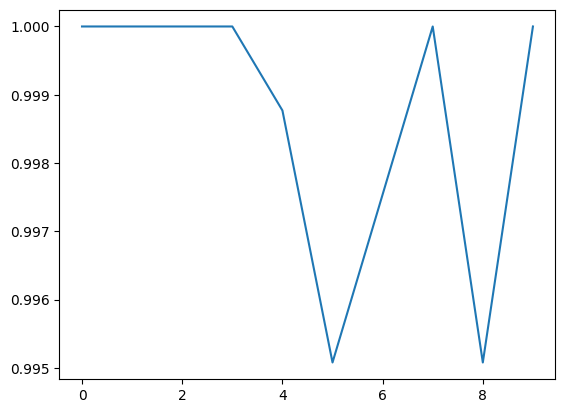

In [ ]:
learn.fit(10, lr=lr)
plt.plot([x[2] for x in learn.recorder.values])

epoch,train_loss,valid_loss,accuracy,time
0,0.000998,0.000056,1.000000,00:01
1,0.000541,0.000034,1.000000,00:01
2,0.000388,0.000045,1.000000,00:01
3,0.001351,0.000030,1.000000,00:01
4,0.000588,0.000033,1.000000,00:01


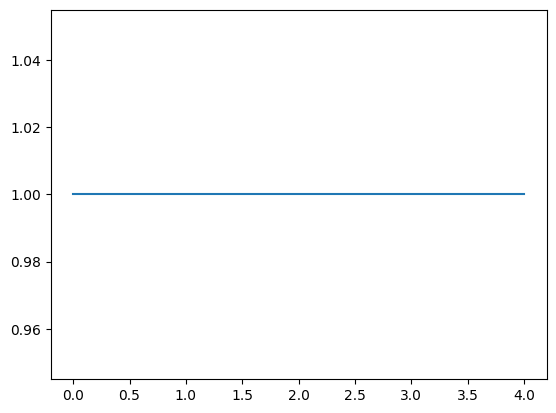

In [ ]:
learn.fit_one_cycle(5)
plt.plot([x[2] for x in learn.recorder.values])

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# LogisticRegression
logreg = LogisticRegression()

# Logistic regression model fit to training data
logreg.fit(train_data.iloc[:, 1:], train_data.iloc[:, 0])

# Prediction 
y_pred = logreg.predict(test_data.iloc[:, 1:])


accuracy = accuracy_score(test_data.iloc[:, 0], y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0
